<a href="https://colab.research.google.com/github/santhoshsrivi/BITS/blob/main/Group_82_KNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are working on KNN project dataset

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
#Reading the dataset to dataframe
df = pd.read_csv('KNN_Project.csv')

In [4]:
#Printing the top 10 rows for sanity check
df.head(10)

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1536.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1113.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1304.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1057.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1023.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0
5,1587.993461,667.420121,2072.048544,364.624958,905.011385,2229.178514,880.442566,568.698408,645.719217,2156.949990,1
6,1497.293624,822.435853,908.059366,671.797517,1280.270442,1910.066313,1052.812386,713.757499,703.951632,1088.493788,0
7,1172.820769,1166.958461,455.656588,445.572745,1109.894585,1045.551452,1301.821786,264.940137,945.023932,2307.922229,0
8,839.494647,1089.747059,653.699894,659.334590,1529.725972,1521.320489,1401.676227,433.025043,1289.063583,1690.149835,0
9,1028.689140,202.089774,1030.841860,429.109102,943.104815,1978.506855,653.178512,753.655291,1336.375960,1057.864848,1


In [5]:
#Removing Outliers if any because KNN is sensitive to outliers

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_limit=Q1-(1.5 * IQR)
upper_limit=Q3+(1.5 * IQR)

for i in range(len(df.columns)):
    if df.columns[i]!='TARGET CLASS':
        df.loc[df[df.columns[i]] > upper_limit[df.columns[i]],df.columns[i]]=upper_limit[df.columns[i]]
        df.loc[df[df.columns[i]] < lower_limit[df.columns[i]],df.columns[i]]=lower_limit[df.columns[i]]
        


In [6]:
#Normalizing the dataset because if we do not do this step then the distance measure of KNN would not be reliable

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df.drop('TARGET CLASS',axis=1))

scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

scaled_features

array([[ 1.29929869, -0.44345543,  1.61980773, ..., -0.9349602 ,
         1.00960186, -1.06968996],
       [ 0.15735521, -1.05671304,  1.7419175 , ..., -0.46230642,
         0.25889395, -1.04160654],
       [ 0.67166739, -0.43700102,  0.77579285, ...,  1.15475492,
         2.18719479,  0.34287148],
       ...,
       [-0.3590484 , -0.97913897,  0.83771499, ..., -1.51902295,
        -0.2750579 ,  0.86439213],
       [ 0.27516424, -0.99252583,  0.0303711 , ..., -0.03511666,
         0.43742859, -0.212444  ],
       [ 0.6261117 ,  0.79532787,  1.12180047, ..., -1.25489817,
        -0.60377843, -0.8799049 ]])

## Train test split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

## Using KNN

## Choosing a K Value

In [8]:
#Before we Apply the KNN algorithm, it is important to chose the best value of K
#We want to calculate the best k value. For that we are finding the error rates for all K's where maximum value 
#we have chosen is the length of the test set


error_rate = []

for i in range(1,len(X_test)):
    Knn = KNeighborsClassifier(n_neighbors=i)
    Knn.fit(X_train,y_train)
    pred_i = Knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.14 at K = 159


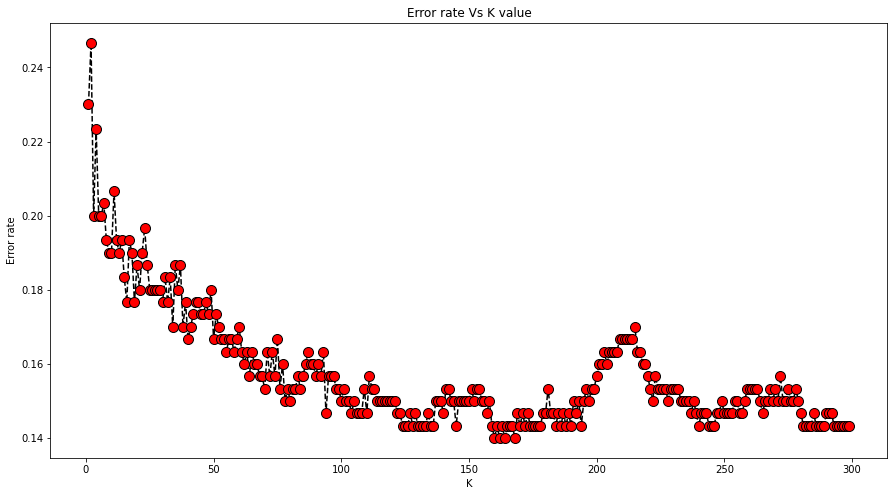

In [9]:
#Here we find the optimal value of k. Usually the optimal value of K is sqrt(n) where n is the number of samples but it is always favorable to plot an
#error graph and find the optimal value of k where the error rate is minimum

plt.figure(figsize=(15,8))
plt.plot(range(1,len(X_test)),error_rate,color='black',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate Vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))
optimal_k=error_rate.index(min(error_rate))


#Though we have the optimal value, we have reported out the metrics for few other K values as well as follows

<h1>Model Building and Evaluation</h1>

In [10]:
# Now we want to report out the evaluation metrics for the optimal k. Here there is no concept of First training and then testing
#because KNN is a lazy learner. So we 
#just fit the training points in a n-dimensional space and then predict the label for the test instances

print('Optimal K is '+str(optimal_k))
knn = KNeighborsClassifier(n_neighbors=optimal_k)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=' +str(optimal_k))
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

Optimal K is 159
WITH K=159


[[124  26]
 [ 17 133]]


              precision    recall  f1-score   support

           0       0.88      0.83      0.85       150
           1       0.84      0.89      0.86       150

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



<h1>Comparision to various random K Values</h1>

In [11]:
# K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)


print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[117  33]
 [ 36 114]]


              precision    recall  f1-score   support

           0       0.76      0.78      0.77       150
           1       0.78      0.76      0.77       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



In [12]:
# NOW WITH K=42
knn = KNeighborsClassifier(n_neighbors=42)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)


print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[120  30]
 [ 22 128]]


              precision    recall  f1-score   support

           0       0.85      0.80      0.82       150
           1       0.81      0.85      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [13]:
# NOW WITH K=57
knn = KNeighborsClassifier(n_neighbors=57)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)


print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))



[[120  30]
 [ 20 130]]


              precision    recall  f1-score   support

           0       0.86      0.80      0.83       150
           1       0.81      0.87      0.84       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



In [14]:
#We see that the f1-Score is the maximum for the optimal_k. Hence for predictions we will use the optimal K

<h1>Predictions</h1>

In [15]:
#This is how we input an instance and the KNN model predicts the label. below is an example. Here we go with the optimal k

knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knn.predict([[1000,900.23,700,20,400,650,685,985,112,729]])

array([0])